In [59]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [60]:
# load data

df = pd.read_csv('aimlabs_data.csv')
df.head()


,Name,Group,Music,score,acc,kps,trgkill,rxtime,tottrg,totshot
0,Ayush Yadav,1 (No Music),NaN,"54552, 57656, 52285, 57899, 62958, 57746","90.2, 87.7, 75.5, 83.3, 95.6, 90.4","1.6, 1.8, 1.8, 1.8, 1.8, 1.7","101, 107, 108, 110, 109, 104","586, 552, 547, 533, 541, 567","102, 108, 110, 112, 110, 106","112, 122, 143, 132, 114, 115"
1,Jai Bhatnagar,2 (EM high tempo),Crystal Kid 3 by Tomas Skyldeberg,"50629, 53306, 51638, 54642, 50624, 49127","93.8, 93.2, 93.1, 96.0, 91.2, 93.8","1.5, 1.6, 1.6, 1.6, 1.5, 1.5","91, 96, 95, 97, 93, 91","637, 614, 623, 608, 621, 653","94, 98, 96, 98, 96, 92","97, 103, 102, 101, 102, 97"
2,Ashmit Chamoli,3 (EM low tempo),The Last Fox - Penumbra,"39248, 47609, 44418, 49858, 45135, 46923","85.9, 84.5, 80.9, 87.2, 77.3, 78.0","1.3, 1.6, 1.4, 1.6, 1.6, 1.6","79, 93, 89, 95, 92, 96","736, 629, 651, 615, 609, 600","82, 96, 92, 98, 98, 100","92, 110, 110, 109, 119, 123"
3,Rushil Kaul,4 (Classical high tempo),"Concerto Grosso for Strings ""Palladio"": I. All...","34243, 35631, 37459, 41595, 45874, 45082","87.3, 83.9, 87.2, 91.9, 95.5, 94.4","1.1, 1.2, 1.3, 1.4, 1.4, 1.4","69, 73, 75, 79, 84, 84","796, 735, 745, 728, 693, 701","76, 82, 80, 82, 86, 86","79, 87, 86, 86, 88, 89"
4,Aarnav Nagariya,5 (Classical low tempo),"J.S. Bach: Orchestral Suite No. 3 in D Major, ...","33760, 46727, 47115, 46647, 45132, 51968","77.9, 89.1, 84.4, 87.5, 84.8, 91.4","1.3, 1.5, 1.5, 1.5, 1.5, 1.6","74, 90, 92, 91, 89, 96","737, 663, 634, 637, 648, 617","82, 90, 94, 94, 92, 98","95, 101, 109, 104, 105, 105"


<Axes: >

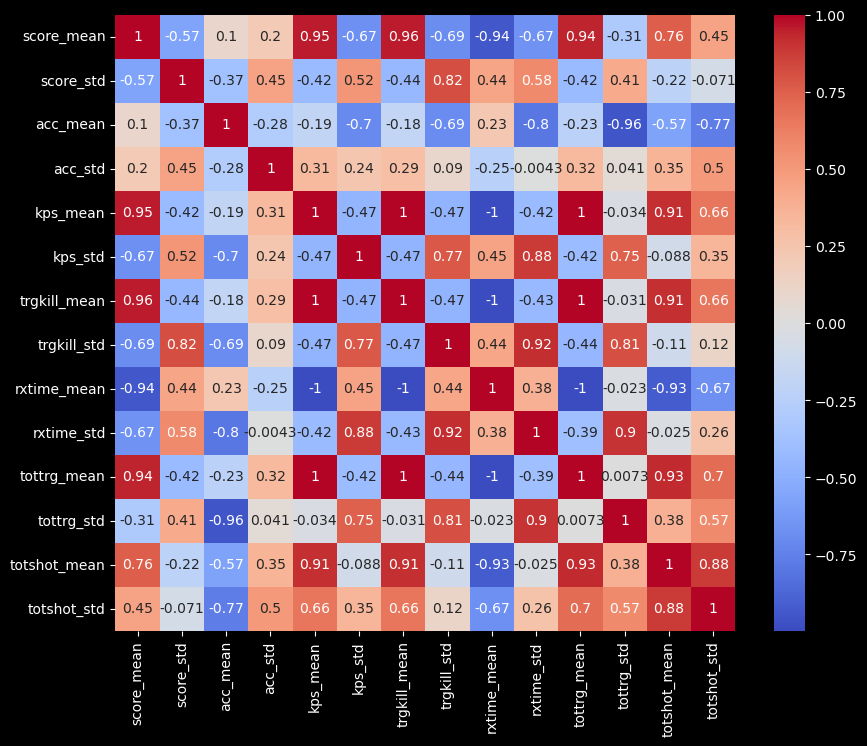

In [61]:
# correlation matrix

temp_df = df.drop(['Name', 'Group', 'Music'], axis=1)
temp_df = temp_df.map(lambda x: np.array([float(i) for i in x.split(',')]))

temp_df_metrics = pd.DataFrame()
for col in temp_df.columns:
    temp_df_metrics[col + '_mean'] = temp_df[col].map(lambda x: np.mean(x))
    temp_df_metrics[col + '_std'] = temp_df[col].map(lambda x: np.std(x))

corr = temp_df_metrics.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')


# Group 1 Analysis

In [62]:
# filter group 1 (no music)

df1 = df[df['Group'] == '1 (No Music)']
df1 = df1.drop(['Name', 'Group', 'Music'], axis=1)
df1 = df1.map(lambda x: np.array([float(i) for i in x.split(',')]))
df1.head()


,score,acc,kps,trgkill,rxtime,tottrg,totshot
0,"[54552.0, 57656.0, 52285.0, 57899.0, 62958.0, ...","[90.2, 87.7, 75.5, 83.3, 95.6, 90.4]","[1.6, 1.8, 1.8, 1.8, 1.8, 1.7]","[101.0, 107.0, 108.0, 110.0, 109.0, 104.0]","[586.0, 552.0, 547.0, 533.0, 541.0, 567.0]","[102.0, 108.0, 110.0, 112.0, 110.0, 106.0]","[112.0, 122.0, 143.0, 132.0, 114.0, 115.0]"
5,"[44048.0, 43207.0, 48710.0, 48201.0, 53778.0, ...","[87.9, 79.3, 79.5, 82.6, 81.3, 79.8]","[1.4, 1.5, 1.6, 1.5, 1.7, 1.7]","[87.0, 88.0, 97.0, 95.0, 104.0, 103.0]","[680.0, 651.0, 600.0, 613.0, 562.0, 568.0]","[88.0, 92.0, 100.0, 98.0, 106.0, 106.0]","[99.0, 111.0, 122.0, 115.0, 128.0, 129.0]"


In [63]:
df1_metrics = pd.DataFrame()
for col in df1.columns:
    df1_metrics[col + '_mean'] = df1[col].map(lambda x: np.mean(x))
    df1_metrics[col + '_std'] = df1[col].map(lambda x: np.std(x))
df1_metrics.head()


,score_mean,score_std,acc_mean,acc_std,kps_mean,kps_std,trgkill_mean,trgkill_std,rxtime_mean,rxtime_std,tottrg_mean,tottrg_std,totshot_mean,totshot_std
0,57182.666667,3299.407607,87.116667,6.352274,1.750000,0.076376,106.500000,3.095696,554.333333,17.584716,108.000000,3.265986,123.000000,11.165423
5,48304.333333,3808.655698,81.733333,2.989240,1.566667,0.110554,95.666667,6.574361,612.333333,42.279493,98.333333,6.674995,117.333333,10.434984


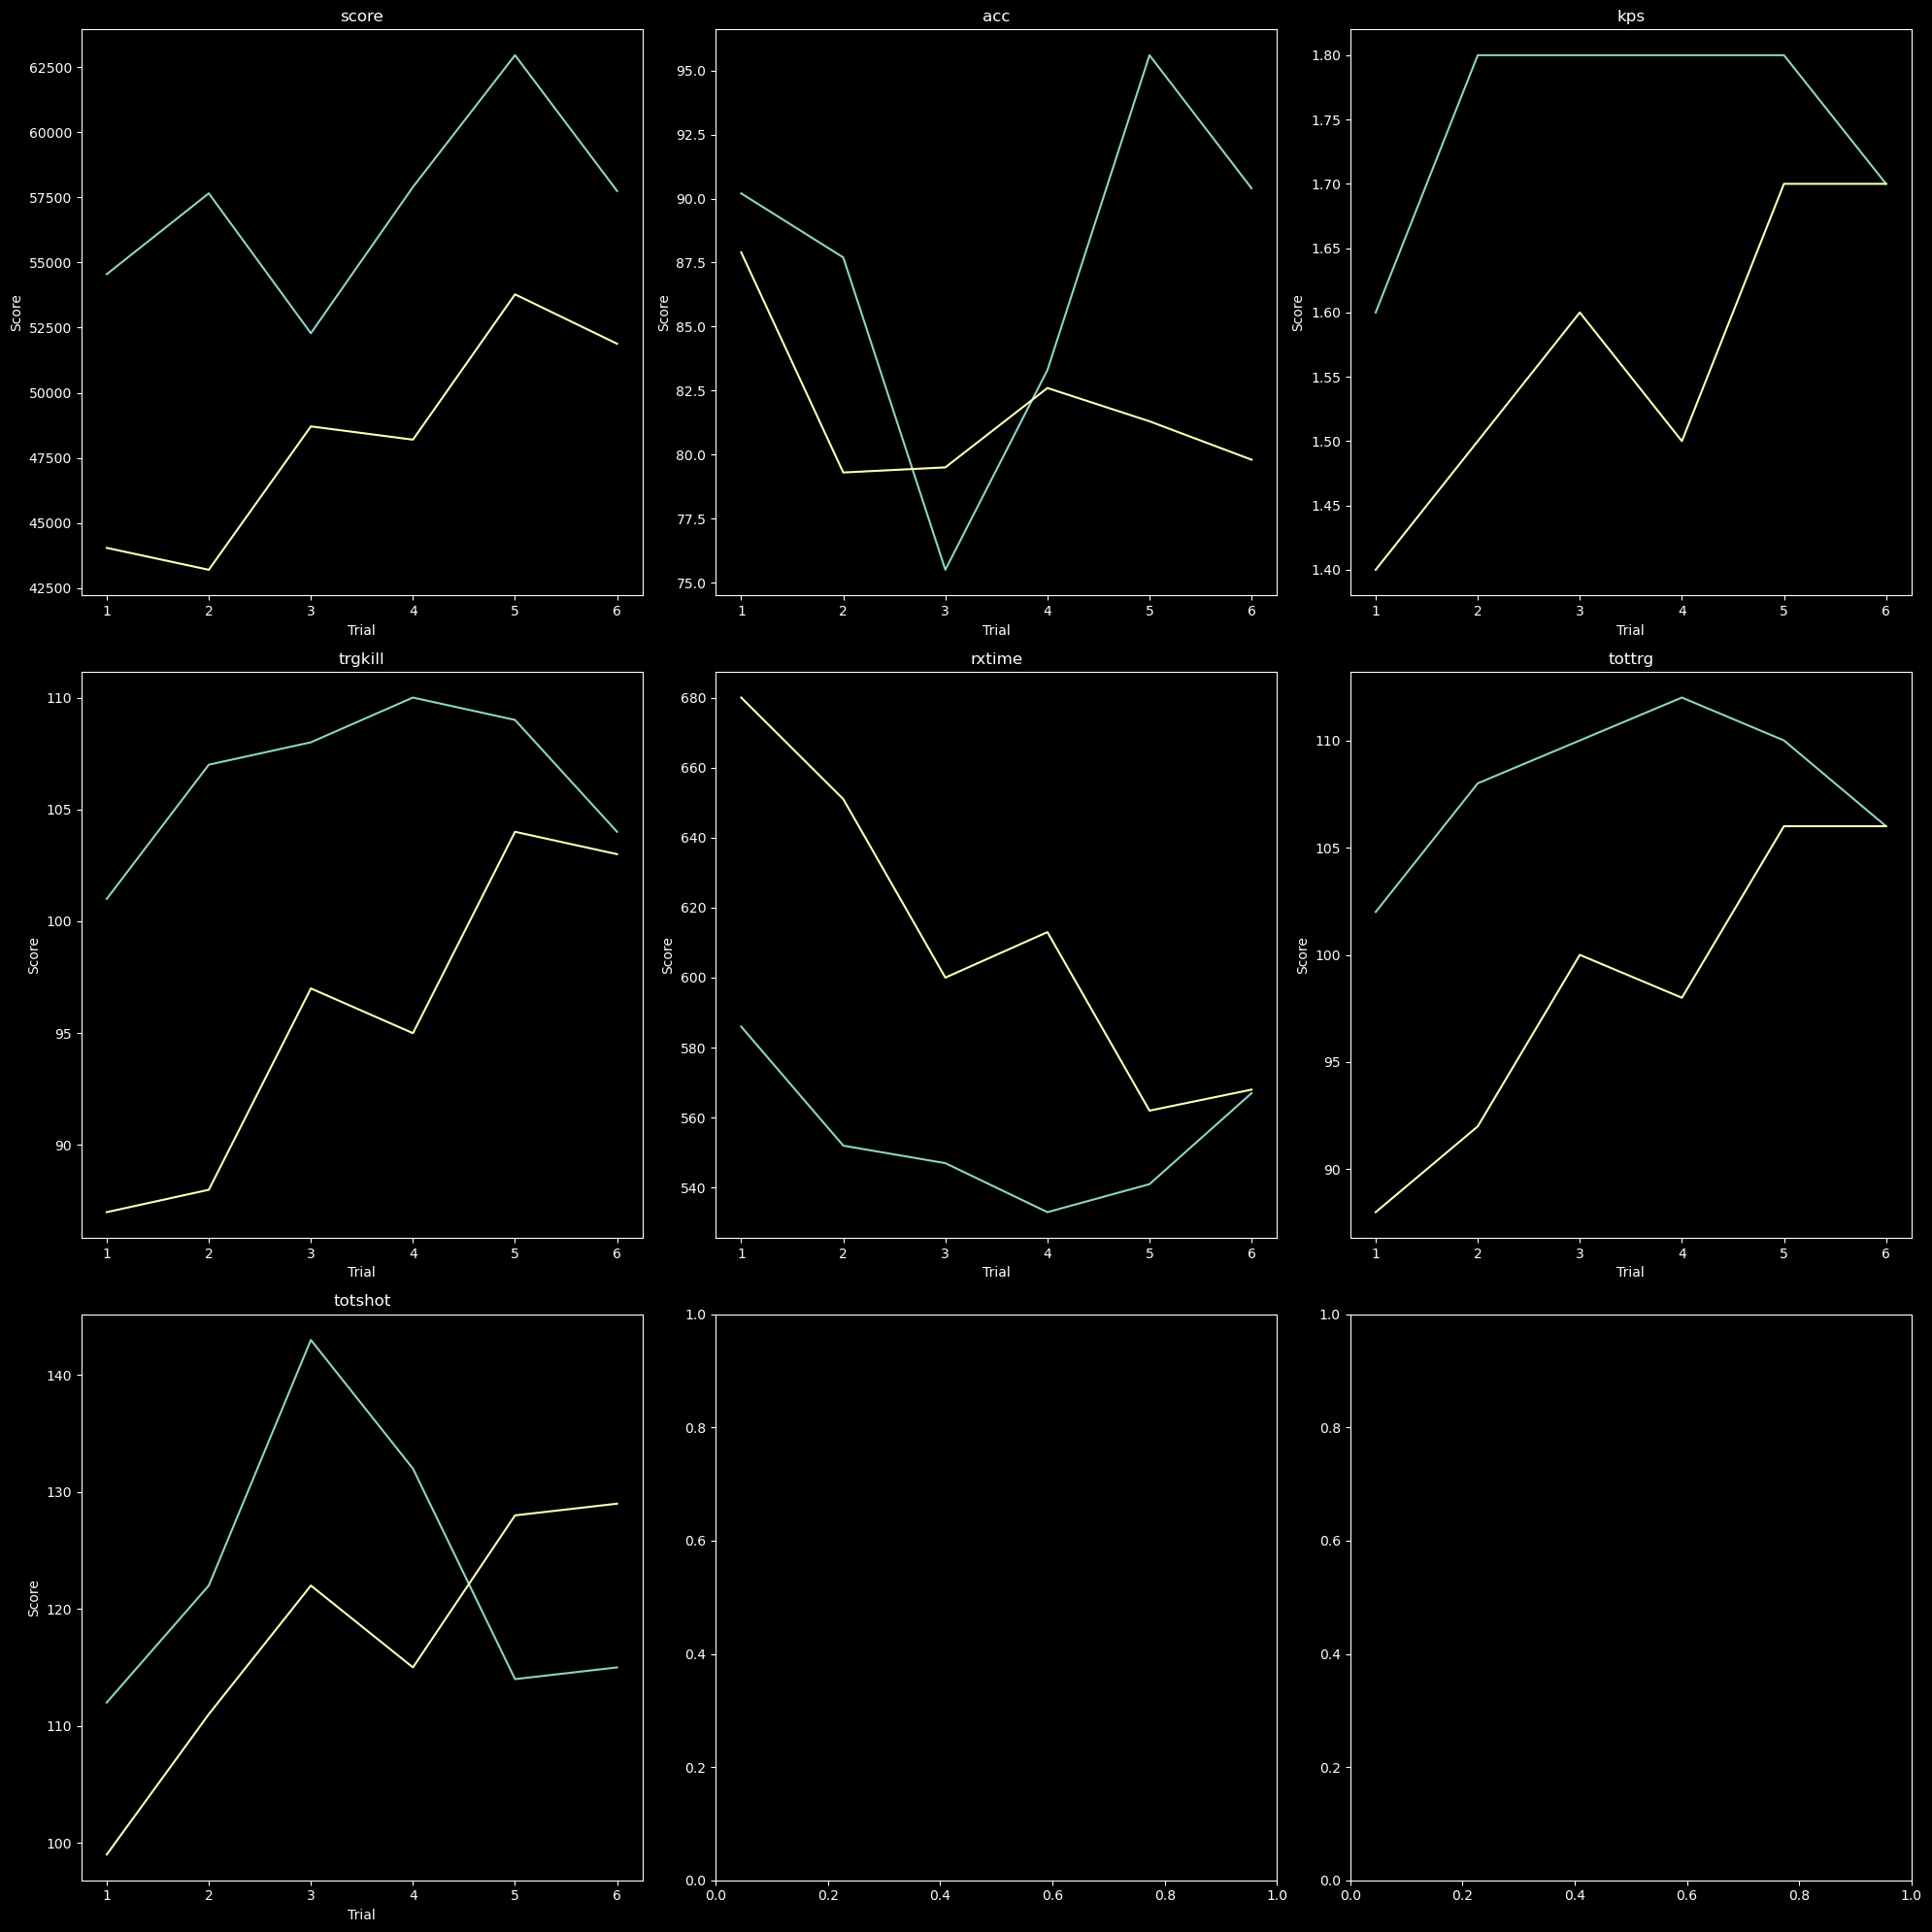

In [74]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i, col in enumerate(df1.columns):
    ax = axes[i // 3, i % 3]
    for row in df1.index:
        ax.plot(df1.loc[row, col][:6])
    ax.set_title(col)
    ax.set_xticks(range(6))
    ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
    ax.set_xlabel('Trial')
    ax.set_ylabel('Score')
plt.tight_layout()


# Group 2 Analysis

In [64]:
# filter group 2 (EM high tempo)

df2 = df[df['Group'] == '2 (EM high tempo)']
df2 = df2.drop(['Name', 'Group', 'Music'], axis=1)
df2.head()


,score,acc,kps,trgkill,rxtime,tottrg,totshot
1,"50629, 53306, 51638, 54642, 50624, 49127","93.8, 93.2, 93.1, 96.0, 91.2, 93.8","1.5, 1.6, 1.6, 1.6, 1.5, 1.5","91, 96, 95, 97, 93, 91","637, 614, 623, 608, 621, 653","94, 98, 96, 98, 96, 92","97, 103, 102, 101, 102, 97"


In [65]:
# filter group 3 (EM low tempo)

df3 = df[df['Group'] == '3 (EM low tempo)']
df3 = df3.drop(['Name', 'Group', 'Music'], axis=1)
df3.head()


,score,acc,kps,trgkill,rxtime,tottrg,totshot
2,"39248, 47609, 44418, 49858, 45135, 46923","85.9, 84.5, 80.9, 87.2, 77.3, 78.0","1.3, 1.6, 1.4, 1.6, 1.6, 1.6","79, 93, 89, 95, 92, 96","736, 629, 651, 615, 609, 600","82, 96, 92, 98, 98, 100","92, 110, 110, 109, 119, 123"


In [66]:
# filter group 4 (Classical high tempo)

df4 = df[df['Group'] == '4 (Classical high tempo)']
df4 = df4.drop(['Name', 'Group', 'Music'], axis=1)
df4.head()


,score,acc,kps,trgkill,rxtime,tottrg,totshot
3,"34243, 35631, 37459, 41595, 45874, 45082","87.3, 83.9, 87.2, 91.9, 95.5, 94.4","1.1, 1.2, 1.3, 1.4, 1.4, 1.4","69, 73, 75, 79, 84, 84","796, 735, 745, 728, 693, 701","76, 82, 80, 82, 86, 86","79, 87, 86, 86, 88, 89"


In [67]:
# filter group 5 (Classical low tempo)

df5 = df[df['Group'] == '5 (Classical low tempo)']
df5 = df5.drop(['Name', 'Group', 'Music'], axis=1)
df5.head()


,score,acc,kps,trgkill,rxtime,tottrg,totshot
4,"33760, 46727, 47115, 46647, 45132, 51968","77.9, 89.1, 84.4, 87.5, 84.8, 91.4","1.3, 1.5, 1.5, 1.5, 1.5, 1.6","74, 90, 92, 91, 89, 96","737, 663, 634, 637, 648, 617","82, 90, 94, 94, 92, 98","95, 101, 109, 104, 105, 105"
